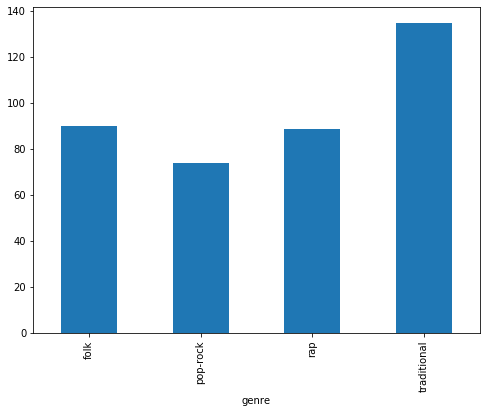

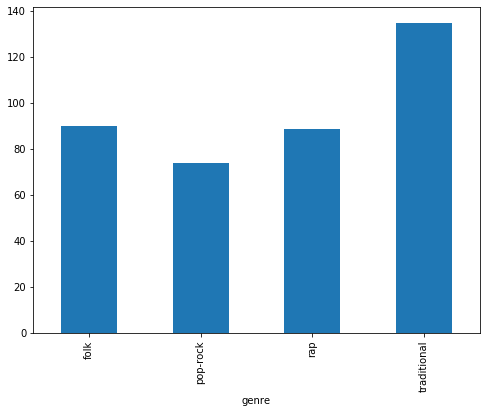

['ΑΛΛΑ', 'ΑΝ', 'ΑΝΤΙ', 'ΑΠΟ', 'ΑΥΤΑ', 'ΑΥΤΕΣ', 'ΑΥΤΗ', 'ΑΥΤΟ', 'ΑΥΤΟΙ', 'ΑΥΤΟΣ', 'ΑΥΤΟΥΣ', 'ΑΥΤΩΝ', 'ΓΙΑ', 'ΔΕ', 'ΔΕΝ', 'ΕΑΝ', 'ΕΙΜΑΙ', 'ΕΙΜΑΣΤΕ', 'ΕΙΝΑΙ', 'ΕΙΣΑΙ', 'ΕΙΣΤΕ', 'ΕΚΕΙΝΑ', 'ΕΚΕΙΝΕΣ', 'ΕΚΕΙΝΗ', 'ΕΚΕΙΝΟ', 'ΕΚΕΙΝΟΙ', 'ΕΚΕΙΝΟΣ', 'ΕΚΕΙΝΟΥΣ', 'ΕΚΕΙΝΩΝ', 'ΕΝΩ', 'ΕΠΙ', 'Η', 'ΘΑ', 'ΙΣΩΣ', 'Κ', 'ΚΑΙ', 'ΚΑΤΑ', 'ΚΙ', 'ΜΑ', 'ΜΕ', 'ΜΕΤΑ', 'ΜΗ', 'ΜΗΝ', 'ΝΑ', 'Ο', 'ΟΙ', 'ΟΜΩΣ', 'ΟΠΩΣ', 'ΟΣΟ', 'ΟΤΙ', 'ΠΑΡΑ', 'ΠΟΙΑ', 'ΠΟΙΕΣ', 'ΠΟΙΟ', 'ΠΟΙΟΙ', 'ΠΟΙΟΣ', 'ΠΟΙΟΥΣ', 'ΠΟΙΩΝ', 'ΠΟΥ', 'ΠΡΟΣ', 'ΠΩΣ', 'ΣΕ', 'ΣΤΗ', 'ΣΤΗΝ', 'ΣΤΟ', 'ΣΤΟΝ', 'ΤΑ', 'ΤΗΝ', 'ΤΗΣ', 'ΤΟ', 'ΤΟΝ', 'ΤΟΤΕ', 'ΤΟΥ', 'ΤΩΝ', 'Ω']
(388, 777)


C:\Users\dpapadop\AppData\Local\Continuum\anaconda3\envs\Clean3.7\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αλλα', 'αν', 'αντι', 'απο', 'αυτα', 'αυτες', 'αυτη', 'αυτο', 'αυτοι', 'αυτος', 'αυτους', 'αυτων', 'για', 'δε', 'δεν', 'εαν', 'ειμαι', 'ειμαστε', 'ειναι', 'εισαι', 'ειστε', 'εκεινα', 'εκεινες', 'εκεινη', 'εκεινο', 'εκεινοι', 'εκεινος', 'εκεινους', 'εκεινων', 'ενω', 'επι', 'θα', 'ισως', 'και', 'κατα', 'κι', 'μα', 'με', 'μετα', 'μη', 'μην', 'να', 'οι', 'ομως', 'οπως', 'οσο', 'οτι', 'παρα', 'ποια', 'ποιες', 'ποιο', 'ποιοι', 'ποιος', 'ποιους', 'ποιων', 'που', 'προς', 'πως', 'σε', 'στη', 'στην', 'στο', 'στον', 'τα', 'την', 'της', 'το', 'τον', 'τοτε', 'του', 'των'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


recall:  0.4273897058823529
prec:  0.5580281690140845
f1:  0.46141436800708985
acc:  0.4948453608247423


C:\Users\dpapadop\AppData\Local\Continuum\anaconda3\envs\Clean3.7\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


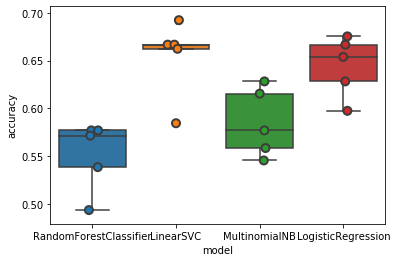

model
LinearSVC                 0.654479
LogisticRegression        0.644289
MultinomialNB             0.584882
RandomForestClassifier    0.551449
Name: accuracy, dtype: float64


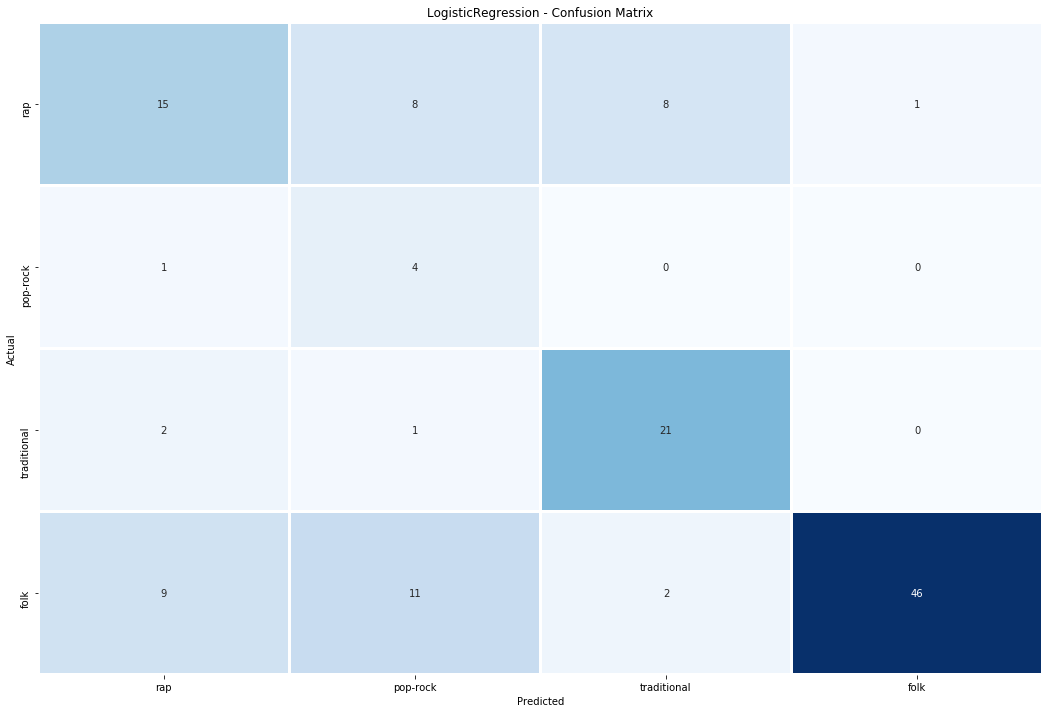

              precision    recall  f1-score   support

         rap       0.47      0.56      0.51        27
    pop-rock       0.80      0.17      0.28        24
 traditional       0.88      0.68      0.76        31
        folk       0.68      0.98      0.80        47

    accuracy                           0.67       129
   macro avg       0.71      0.59      0.59       129
weighted avg       0.70      0.67      0.63       129



In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection

from sklearn import preprocessing

from sklearn.feature_selection import chi2, SelectKBest

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

import spacy
nlp = spacy.load('el_core_news_sm')

def filter_by_freq(df: pd.DataFrame, column: str, min_freq: int) -> pd.DataFrame:
    """Filters the DataFrame based on the value frequency in the specified column.
    :param df: DataFrame to be filtered.
    :param column: Column name that should be frequency filtered.
    :param min_freq: Minimal value frequency for the row to be accepted.
    :return: Frequency filtered DataFrame.
    """
    # Frequencies of each value in the column.
    freq = df[column].value_counts()
    # Select frequent values. Value is in the index.
    frequent_values = freq[freq >= min_freq].index
    # Return only rows with value frequency above threshold.
    return df[df[column].isin(frequent_values)]

# we could use the following for pre-processing
# def remove_accents(data):
#     return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.printable).lower()

'''
df = pd.read_csv('dataset/greekLyrics_ansi.csv', delimiter=';', encoding='ANSI')
print("------------------------------------------------------------------------------")
print("# Dataset")
print("------------------------------------------------------------------------------")
print(df.info())
# print(df.describe())
# print("All genres:", df['genre'].unique())

X = df.iloc[:, 1:4]  # title, artist, lyrics
y = df.iloc[:, 0:1]  # genre

print("\n\n------------------------------------------------------------------------------------")
print("# Features")
print("------------------------------------------------------------------------------------")
print(X.head())

print("\n\n----------------------")
print("# Target")
print("----------------------")
print(y.head())
'''

df = pd.read_csv('dataset/greekLyrics_ansi.csv', delimiter=';', encoding='iso8859_7')
booleanDF = (df.groupby(['genre']).count()>10)
genreToRemove = booleanDF[booleanDF['title'] == False]
genreToRemove = genreToRemove.reset_index()

for index, row in genreToRemove.iterrows():
    delete_row = df[df['genre'] == row['genre']].index
    df.drop(delete_row, inplace=True)
    
rapList = ["RAP","Hip Hop","Ελληνικό Ραπ","Ελληνικό χιπ χοπ"]
pop_rockList = ["Ποπ", "Ελληνικό Ροκ", "Ελληνικό Ποπ"]
traditionalList = ["Παραδοσιακό Κρήτης", "Παραδοσιακό Μικράς Ασίας", "Παραδοσιακό", "Παραδοσιακό Κύπρου", "Δημοτικό", "Νησιώτικο"]
folkList = ["Λαικό", "Ελληνικό λαικό", "Ελληνική μπαλάντα", "Λαικό Μπαλάντα"]

for index, row in df.iterrows():
    if(row['genre'] in rapList):
        row['genre'] = "rap"
    elif(row['genre'] in pop_rockList):
        row['genre'] = "pop-rock"
    elif(row['genre'] in traditionalList):
        row['genre'] = "traditional"
    elif(row['genre'] in folkList):
        row['genre'] = "folk"    
        
data = df[df['genre'] == "rap"]
data = data.append(df[df['genre'] == "pop-rock"], ignore_index=True)
data = data.append(df[df['genre'] == "traditional"], ignore_index=True)
data = data.append(df[df['genre'] == "folk"], ignore_index=True)

data = data.reset_index()
data = data.drop(['index'], axis=1)

import unicodedata
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')
    

for index, row in data.iterrows():
    conference_help_text = (str(row['lyrics']))
    conference_help_doc = nlp(conference_help_text)
    limaList = []
    for token in conference_help_doc:
        limaList.append(token.lemma_)
    
    row['lyrics'] = strip_accents(str(limaList).upper())
    #row['lyrics'] = strip_accents(str(row['lyrics']).upper()) # without lemmatization

df = data

# Plot all the genres of our dataset and the number of tracks per genre
fig = plt.figure(figsize=(8, 6))
df.groupby('genre').title.count().plot.bar(ylim=0)
plt.show()

df = filter_by_freq(df, 'genre', 25)

fig2 = plt.figure(figsize=(8, 6))
df.groupby('genre').title.count().plot.bar(ylim=0)
plt.show()


# Load greek stopwords
with open('resources/greek_stopwords.txt', encoding='UTF-8') as f:
    greek_stopwords = [s for line in f.readlines() for s in line[:-1].split(' ')] 
    
    '''
    import nltk
    nltk.download('punkt')
    from nltk.corpus import stopwords
    greek_stopwords = set(stopwords.words('greek')) 
    '''
    #print(greek_stopwords)
    
greek_stopwords = [x.upper() for x in greek_stopwords]
print(greek_stopwords)    

tf_idf = TfidfVectorizer(sublinear_tf=True,
                        min_df=10,
                        norm='l2',
                        encoding='utf8',
                        ngram_range=(1, 2),
                        stop_words=greek_stopwords)
features = tf_idf.fit_transform(df.lyrics).toarray()
labels = df.genre
print(features.shape)

col = ['genre', 'lyrics']
df = df[col]
df.columns = ['genre', 'lyrics']
df['category_id'] = df['genre'].factorize()[0]
category_id_df = df[['genre', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'genre']].values)
df.head()

# # View the terms that are the most correlated with each genre
# N = 5
# for genre, category_id in sorted(category_to_id.items()):
#     features_chi2 = chi2(features, labels == category_id)
#     indices = np.argsort(features_chi2[0])
#     feature_names = np.array(tfidf.get_feature_names())[indices]
#     unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#     bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     print("# '{}':".format(genre))
#     print("Most correlated unigrams: {}".format(', '.join(unigrams[-N:])))
#     print("Most correlated bigrams: {}".format(', '.join(bigrams[-N:])))

# Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant
X_train, X_test, y_train, y_test = model_selection.train_test_split(df['lyrics'], df['genre'], random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_predicted = clf.predict(count_vect.transform(X_test))

print("recall: ", metrics.recall_score(y_test, y_predicted, average='macro'))
print("prec: ", metrics.precision_score(y_test, y_predicted, average='macro'))
print("f1: ", metrics.f1_score(y_test, y_predicted, average='macro', labels=np.unique(y_predicted)))
print("acc: ", metrics.accuracy_score(y_test, y_predicted))

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model', 'fold_idx', 'accuracy'])

sns.boxplot(x='model', y='accuracy', data=cv_df)
sns.stripplot(x='model', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

print(cv_df.groupby('model').accuracy.mean())


model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
X_train, X_test, y_train, y_test, indices_train, indices_test = \
    model_selection.train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusionMatrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(18, 12))
hm = sns.heatmap(confusionMatrix.T, cmap="Blues", linewidths=2, square=False, annot=True, cbar=False, fmt='d',
                 xticklabels=category_id_df.genre.values, yticklabels=category_id_df.genre.values)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('LogisticRegression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['genre'].unique()))


In [39]:
import spacy
nlp = spacy.load('el_core_news_sm')

conference_help_text = ('καλημέρα ΠΑΙΖΩ τρωω τρως τρωει παιζει παιζουμε παίζετε')
conference_help_doc = nlp(conference_help_text)
#for token in conference_help_doc:
    #print (token, token.lemma_)

print(str(conference_help_doc))

καλημέρα ΠΑΙΖΩ τρωω τρως τρωει παιζει παιζουμε παίζετε
